In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets

# [Методы снижения размерности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8)

#### Почему нужно снижать размерность? 

Потому что пространство признаков может содержать слишком много данных, что затрудняет постороение моделей. Примеры таких пространств мы видели в результате работы методов векторизации текстов CountVectorizer и TfidfVectorizer.

#### Чем снижение размерности отличается от [конструирования признаков?](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)

При конструировании признаков новые признаки, как правило, создаются исходя из семантики предметной области и могут быть интерперетированы с точки зрения предметной области.

При снижении размерности новые признаки генерируются на основе статистических методов и, как правило, теряют семантику, то есть не могут быть ассоциированы с какими-либо объектами или процессами предметной области. Но при этом они сохраняют статистические зависимости исходных признаков и могут быть использованы для построения моделей машинного обучения.



## [Метод главных компонент](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)

Название на английском языке - Principal Component Analysis (PCA).

Метод главных компонент (МГК) остается одним из наиболее применяемых методов снижения размерности.

Интуиция метода изложена в работах Александра Ивановича Орлова [1]:
- Идея МГК состоит в последовательном выявлении направлений, в которых данные имеют наибольший разброс. 
- Прежде всего находят направление максимального разброса, при котором достигает максимума дисперсия случайной величины.
- Затем рассматривают гиперплоскость в n-мерном пространстве, перпендикулярную первой главной компоненте, и проектируют на эту гиперплоскость все элементы выборки. Размерность гиперплоскости на 1 меньше, чем размерность исходного пространства. 
- В рассматриваемой гиперплоскости процедура повторяется. В ней находят направление наибольшего разброса, т.е. вторую главную компоненту. Затем выделяют гиперплоскость, перпендикулярную первым двум главным компонентам. Ее размерность на 2 меньше, чем размерность исходного пространства. 
- Далее действия повторяются пока не выделены К требуемых главных компонент.


Метод главных компонент наиболее часто формулируется в терминах линейной алгебры.

Важным является понятие [ковариационной матрицы.](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)

Вычисление главных компонент может быть сведено к вычислению [сингулярного разложения](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5) матрицы данных или к вычислению [собственных векторов и собственных значений](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80) ковариационной матрицы данных.

Связь между SVD и PCA детально рассмотрена в статье [Machine Learning — Singular Value Decomposition (SVD) & Principal Component Analysis (PCA)](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491) а также в [документации scikit-learn.](https://scikit-learn.org/stable/modules/decomposition.html#lsa)

В библиотеке scikit-learn метод главных компонент и его модификации рассмотрены в разделе [2.5. Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html)

[Описание основного класса,](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) реализующего метод главных компонент.

Рассмотрим примеры снижения размерности на основе метода главных компонент.

In [2]:
#Источник - https://github.com/Yorko/mlcourse.ai/tree/master/jupyter_russian/topic07_unsupervised

# np.random.multivariate_normal - генерация случайных чисел на основе нормального распределения
# и заданных средних значений и ковариационной матрицы

np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X1 = np.random.multivariate_normal(mean, cov, 300)
X1[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


array([[-1.83120164,  2.95185814],
       [-0.17650378,  2.22936562],
       [-2.52117612,  2.71453894],
       [-1.13880803,  1.48231246],
       [ 0.28761926, -0.04553854],
       [ 0.44160322,  0.65761433],
       [-0.81119653,  1.25854161],
       [-0.36387766,  0.81100797],
       [-1.77718918,  2.34066738],
       [-0.70966524,  0.25277676]])

In [3]:
pca = PCA()
pca.fit(X1)
print('Доля объясненной дисперсии: {}'.format(pca.explained_variance_ratio_))

Доля объясненной дисперсии: [0.93905057 0.06094943]


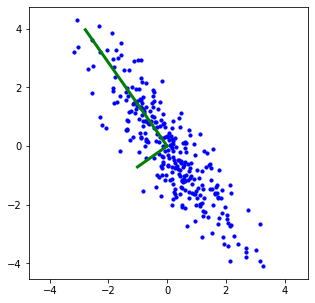

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X1[:, 0], X1[:, 1], s=10, c='b')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-g', lw=3)
plt.axis('equal')
plt.show()

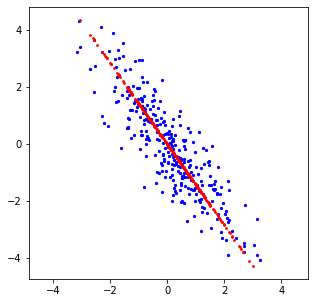

In [5]:
# Мы хотим сохранить 85% дисперсии
pca = PCA(0.85)
X_reduced = pca.fit_transform(X1)

# Строим проекции на главную компоненту
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(5,5))
plt.scatter(X1[:, 0], X1[:, 1], s=5, c='b')
plt.scatter(X_new[:, 0], X_new[:, 1], s=3, c='r')
plt.axis('equal')
plt.show()

#### Эксперимент с набором данных по ирисам:

In [6]:
iris = datasets.load_iris()
iris_X, iris_y = iris.data, iris.target
iris_X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris_X)
print('Доля объясненной дисперсии: {}, сумма={}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))
X_reduced[:10]

Доля объясненной дисперсии: [0.92461872 0.05306648], сумма=0.9776852063187949


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

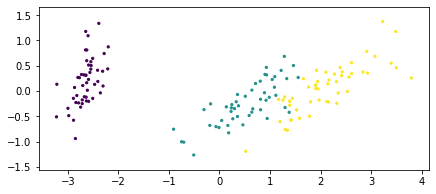

In [8]:
plt.figure(figsize=(7,3))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=5, c=iris_y)
plt.axis('equal')
plt.show()

# Методы снижения размерности (до размерности 2)

Часто применяются на практике для визуализации многомерных данных. Наиболее известным является алгоритм [t-distributed Stochastic Neighbor Embedding, t-SNE.](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B2%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%D1%81_t-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC)

Рассмотрим работу метода на основе статьи [Алгоритм t-SNE. Иллюстрированный вводный курс.](http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/)

В библиотеке scikit-learn метод реализован с использованием класса [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

#### Эксперимент с набором данных по ирисам:

In [9]:
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(iris_X)
X_embedded[:10]

array([[-11.067923 , -22.283087 ],
       [-11.5995035, -19.70748  ],
       [-10.444678 , -19.758066 ],
       [-10.742284 , -19.350029 ],
       [-10.610111 , -22.362768 ],
       [-10.57011  , -24.231495 ],
       [ -9.980202 , -20.065914 ],
       [-10.991919 , -21.554623 ],
       [-10.710452 , -18.616665 ],
       [-11.448912 , -20.13885  ]], dtype=float32)

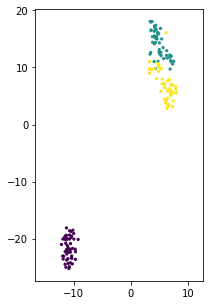

In [10]:
plt.figure(figsize=(3,5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=5, c=iris_y)
plt.axis('equal')
plt.show()

# Источники

1. Орлов А.И. Прикладная статистика. М.: Издательство «Экзамен», 2004.
1. Жерон О. Прикладное  машинное  обучение  с  помощью  Scikit-Learn  и  TensorFlow: концепции,  инструменты и техники для создания  интеллектуальных систем. СпБ.: ООО Альфа-книга: 2018.

## Статьи
- [Открытый курс по машинному обучению. Тема 7. Обучение без учителя](https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic07_unsupervised/lesson7_part1_PCA.ipynb)
- [Как работает метод главных компонент (PCA) на простом примере](https://habr.com/ru/post/304214/)
- [Machine Learning — Singular Value Decomposition (SVD) & Principal Component Analysis (PCA)](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
- [Введение в t-SNE](https://habr.com/ru/post/267041/)
- [Алгоритм t-SNE. Иллюстрированный вводный курс](http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/)
